In [86]:
import pandas as pd

In [87]:
fbdata = pd.read_csv('/Users/enod/Development/fb-scrape/facebook-page-post-scraper/156915824368931_facebook_statuses.csv')

## Exploring pandas Series

In [88]:
fbdata.dtypes

status_id           object
status_message      object
link_name           object
status_type         object
status_link         object
status_published    object
num_reactions        int64
num_comments         int64
num_shares           int64
num_likes            int64
num_loves            int64
num_wows             int64
num_hahas            int64
num_sads             int64
num_angrys           int64
dtype: object

In [89]:
fbdata['status_type'].describe()

count      3212
unique        5
top       video
freq       1023
Name: status_type, dtype: object

In [90]:
fbdata.status_type.value_counts()

video     1023
photo      968
link       704
status     455
event       62
Name: status_type, dtype: int64

In [91]:
fbdata.status_type.value_counts(normalize=True)

video     0.318493
photo     0.301370
link      0.219178
status    0.141656
event     0.019303
Name: status_type, dtype: float64

Дээрхи дээр 31% нь видео, 30% зурган контент гэх мэт байдлаар ойлгож болно

In [92]:
fbdata.status_type.nunique()

5

In [93]:
fbdata.status_type.unique()

array(['photo', 'video', 'link', 'status', 'event'], dtype=object)

In [94]:
pd.crosstab(fbdata.status_type,fbdata.num_comments)

num_comments,0,1,2,3,4,5,6,7,8,9,...,1257,1776,2204,2405,2412,2961,3942,5394,6911,8731
status_type,,,,,,,,,,,,,,,,,,,,,
event,24,12,8,3,0,2,1,3,2,1,...,0,0,0,0,0,0,0,0,0,0
link,460,62,21,18,13,12,9,3,5,4,...,0,0,0,0,0,0,0,0,0,0
photo,115,59,51,41,41,36,32,18,32,10,...,1,0,1,0,0,0,0,0,0,0
status,57,18,30,20,19,15,17,17,12,14,...,0,1,0,0,0,0,0,0,0,0
video,85,68,60,43,43,33,35,24,30,19,...,0,0,0,1,1,1,1,1,1,1


In [95]:
fbdata.num_comments.describe()

count    3212.000000
mean       43.673101
std       262.016036
min         0.000000
25%         1.000000
50%         7.000000
75%        26.000000
max      8731.000000
Name: num_comments, dtype: float64

In [96]:
fbdata.num_comments.mean()

43.67310087173101

In [97]:
%matplotlib inline

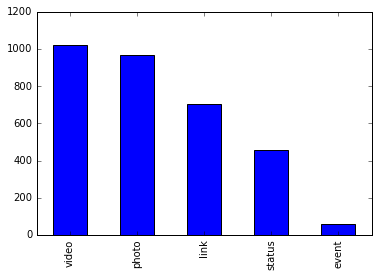

In [98]:
fbdata.status_type.value_counts().plot(kind='bar')

## How to handle missing values?

In [99]:
fbdata.tail()

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
3207,156915824368931_185253524868494,RT @historychannel: THIS DAY IN HISTORY: 1999 ...,This Day in History || Энэ өдөр түүхийн хуудсанд,link,http://bit.ly/ouNIhf,2011-07-18 18:29:23,0,0,0,0,0,0,0,0,0
3208,156915824368931_161390890588091,Check out the latest premiering on our screen ...,NaN,status,NaN,2011-04-26 20:47:45,0,0,0,0,0,0,0,0,0
3209,156915824368931_188651037848505,Манай дэлэгцнээ гарч буй шинэ нэвтрүүлгүүд бол...,Монгол ТВ | HDTV,link,http://www.mongoltv.mn/,2011-04-26 20:45:21,2,3,0,2,0,0,0,0,0
3210,156915824368931_159670110760169,Таны үзэх дуртай гэр бүлийн нэвтрүүлгийн төрөл:,NaN,status,NaN,2011-04-18 22:26:26,4,1,0,4,0,0,0,0,0
3211,156915824368931_156918104368703,Mongol TV is on facebook...,NaN,status,NaN,2011-04-05 02:45:42,10,5,0,10,0,0,0,0,0


Дээрхи хүснэгт дээр хэд хэдэн NaN зүйлс байгааг харж байгаа байх. Энэ нь тухайн хэсэг дээр утга байхгүй байгааг илэрхийлж байгаа юм

In [100]:
fbdata.isnull().tail()

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
3207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3208,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
3209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3210,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
3211,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False


In [101]:
fbdata.notnull().tail()

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
3207,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3208,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True
3209,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3210,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True
3211,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True


sum() method нь True False-с True-г нь тоолоод буцаадаг. Тэгвэл isnull-н үр дүнг sum()-р тоолвол:

In [102]:
fbdata.isnull().sum(axis=0)

status_id             0
status_message      563
link_name           799
status_type           0
status_link         464
status_published      0
num_reactions         0
num_comments          0
num_shares            0
num_likes             0
num_loves             0
num_wows              0
num_hahas             0
num_sads              0
num_angrys            0
dtype: int64

In [103]:
fbdata[(fbdata.status_message.isnull())].head()

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
13,156915824368931_1114026441991193,NaN,Mongol TV's cover photo,photo,https://www.facebook.com/mongoltv/photos/a.321...,2016-07-18 23:24:51,668,114,23,655,11,1,1,0,0
17,156915824368931_1111189798941524,NaN,Говь-Алтай чиглэлд зорчиж буй жолооч нар анхаа...,link,http://www.olloo.mn/n/31317.html,2016-07-15 01:52:22,40,8,51,35,0,2,0,3,0
71,156915824368931_1108262952567542,NaN,Mongol TV,link,NaN,2016-07-10 23:14:02,34,9,0,34,0,0,0,0,0
148,156915824368931_1106886582705179,NaN,Mongol TV,link,NaN,2016-07-08 21:00:12,76,12,0,76,0,0,0,0,0
150,156915824368931_1106875972706240,NaN,Mongol TV's cover photo,photo,https://www.facebook.com/mongoltv/photos/a.321...,2016-07-08 20:30:49,2194,19,40,2181,7,5,1,0,0


In [104]:
fbdata.shape

(3212, 15)

##### NaN хэсэгтэй row болгоныг оруулахгүй байхыг хүсвэл dropna method дуудаж болно:

In [105]:
fbdata.dropna(how='any').shape

(1863, 15)

In [106]:
fbdata.dropna(how='any').head()

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,156915824368931_1125851687475335,Өнөөдөр орой хүлээн авч үзээрэй,Timeline Photos,photo,https://www.facebook.com/mongoltv/photos/a.349...,2016-08-05 04:16:11,44,6,1,44,0,0,0,0,0
2,156915824368931_1125189747541529,Бригад реалити шоу,Шууд эфир /туршилт/,video,https://www.facebook.com/mongoltv/videos/11251...,2016-08-04 04:39:58,293,52,39,276,9,4,1,1,2
3,156915824368931_1125116847548819,Өнөөдөр орой манай ТВ-ээр,Timeline Photos,photo,https://www.facebook.com/mongoltv/photos/a.349...,2016-08-04 01:57:23,63,18,3,59,1,1,1,0,1
4,156915824368931_1123607134366457,Өнөө орой,Timeline Photos,photo,https://www.facebook.com/mongoltv/photos/a.349...,2016-08-02 00:30:56,56,14,1,56,0,0,0,0,0
9,156915824368931_1116179375109233,"МонголTV ""Олон улсын эрэн сурвалжлах сэтгүүлчд...",Photos from Mongol TV's post,photo,https://www.facebook.com/mongoltv/photos/a.606...,2016-07-22 06:38:41,221,8,15,211,1,9,0,0,0


##### Хэрэв аль нэг row бүх талбар нь NaN бөгөөд тэдгээрийг хаяхыг хүсвэл:

In [107]:
fbdata.dropna(how='all').shape

(3212, 15)

##### Заасан column-уудад NaN байгаа бол тэдгээрийг алгасахдаа:

In [108]:
fbdata.dropna(subset=['status_message','status_link'], how='all').shape

(3209, 15)

In [109]:
fbdata['status_type'].value_counts(dropna=False)

video     1023
photo      968
link       704
status     455
event       62
Name: status_type, dtype: int64

In [110]:
fbdata['status_type'].value_counts()

video     1023
photo      968
link       704
status     455
event       62
Name: status_type, dtype: int64

In [111]:
fbdata['status_message'].fillna(value='0',  inplace=True)

In [112]:
fbdata['status_type'].value_counts()

video     1023
photo      968
link       704
status     455
event       62
Name: status_type, dtype: int64

### Pandas Index талаар

In [113]:
fbdata.shape

(3212, 15)

In [114]:
fbdata.index

RangeIndex(start=0, stop=3212, step=1)

In [115]:
fbdata.columns

Index(['status_id', 'status_message', 'link_name', 'status_type',
       'status_link', 'status_published', 'num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys'],
      dtype='object')

In [116]:
fbdata[fbdata.status_type=='video'].tail()

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
2560,156915824368931_475227169195698,Манай Монгол Тв шинэ жилийн баярт зориулан ура...,5in esreg 2,video,http://www.youtube.com/watch?v=8JxA_00dySY,2012-12-25 04:37:59,10,7,0,10,0,0,0,0,0
2572,156915824368931_450122948381549,0,NaN,video,https://www.facebook.com/mongoltv/videos/45012...,2012-12-15 04:09:00,15,12,2,15,0,0,0,0,0
2628,156915824368931_407435149324089,http://www.youtube.com/watch?v=RuYUulMrmok&fea...,Эмэгтэйчүүдийн цаг,video,http://www.youtube.com/watch?v=RuYUulMrmok,2012-10-12 05:26:57,8,8,0,8,0,0,0,0,0
2629,156915824368931_154174531390901,http://www.youtube.com/watch?v=L6aM6nUokFY&fea...,Хязгааргүй аялал,video,http://www.youtube.com/watch?v=L6aM6nUokFY,2012-10-12 05:24:01,11,0,2,11,0,0,0,0,0
2630,156915824368931_336704529758762,Наашаа цаашаа,Наашаа цаашаа,video,http://www.youtube.com/watch?v=L0M6k5t1iOc,2012-10-12 05:22:16,93,15,3,93,0,0,0,0,0


##### index-ээр хандаад утгыг нь харуулах бол

In [117]:
fbdata.loc[2572, 'status_message']

'0'

##### default index-ийг өөрчлөхдөө

In [118]:
fbdata.set_index('status_id', inplace=True)

In [119]:
fbdata.head()

,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_id,,,,,,,,,,,,,,
156915824368931_1125851687475335,Өнөөдөр орой хүлээн авч үзээрэй,Timeline Photos,photo,https://www.facebook.com/mongoltv/photos/a.349...,2016-08-05 04:16:11,44,6,1,44,0,0,0,0,0
156915824368931_1125254910868346,"""Бригад"" реалити шоуны оролцогчид Сэлэнгэ айма...",NaN,video,https://www.facebook.com/mongoltv/videos/11252...,2016-08-04 07:39:04,34,0,12,32,2,0,0,0,0
156915824368931_1125189747541529,Бригад реалити шоу,Шууд эфир /туршилт/,video,https://www.facebook.com/mongoltv/videos/11251...,2016-08-04 04:39:58,293,52,39,276,9,4,1,1,2
156915824368931_1125116847548819,Өнөөдөр орой манай ТВ-ээр,Timeline Photos,photo,https://www.facebook.com/mongoltv/photos/a.349...,2016-08-04 01:57:23,63,18,3,59,1,1,1,0,1
156915824368931_1123607134366457,Өнөө орой,Timeline Photos,photo,https://www.facebook.com/mongoltv/photos/a.349...,2016-08-02 00:30:56,56,14,1,56,0,0,0,0,0


##### дараах байдлаар харвал индексийг контенттай нь харуулна

In [120]:
fbdata.status_type.head()

status_id
156915824368931_1125851687475335    photo
156915824368931_1125254910868346    video
156915824368931_1125189747541529    video
156915824368931_1125116847548819    photo
156915824368931_1123607134366457    photo
Name: status_type, dtype: object

In [121]:
fbdata.status_type.value_counts()

video     1023
photo      968
link       704
status     455
event       62
Name: status_type, dtype: int64

In [122]:
fbdata.status_type.value_counts().index

Index(['video', 'photo', 'link', 'status', 'event'], dtype='object')

In [123]:
fbdata.status_type.value_counts().values

array([1023,  968,  704,  455,   62])

In [130]:
fbdata.status_type.value_counts().sort_index()

event       62
link       704
photo      968
status     455
video     1023
Name: status_type, dtype: int64

#### Pandas Series хэрхэн үүсгэх вэ? 

In [133]:
test = pd.Series([1,3], index=['156915824368931_1123607134366457', '156915824368931_1125116847548819'], name='population')

In [134]:
type(test)

pandas.core.series.Series

In [135]:
test

156915824368931_1123607134366457    1
156915824368931_1125116847548819    3
Name: population, dtype: int64

concat() нь row-н доор өөр row эсвэл column дээр өөр column залгахад ашиглана

In [137]:
pd.concat([fbdata.status_type, test], axis=1).head()

ValueError: cannot reindex from a duplicate axis